In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
lr = LinearRegression()
lr

In [155]:
Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')

In [156]:
pd.set_option('display.max_columns',200)

In [157]:
Train[Train['Item_Identifier']=='FDS02']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
2864,FDS02,NaN,Regular,0.000000,Dairy,196.4794,OUT027,1985,Medium,Tier 3,Supermarket Type3,5852.3820
3203,FDS02,10.195,Regular,0.145867,Dairy,194.0794,OUT046,1997,Small,Tier 1,Supermarket Type1,3901.5880
4969,FDS02,10.195,Regular,0.146692,Dairy,194.5794,OUT017,2007,NaN,Tier 2,Supermarket Type1,4096.6674
7455,FDS02,10.195,Regular,0.146094,Dairy,196.1794,OUT049,1999,Medium,Tier 1,Supermarket Type1,2926.1910


In [158]:
temp_data = Train[['Item_Identifier','Item_Weight']][Train['Item_Weight'].notnull()].drop_duplicates()

In [159]:
temp_data = temp_data.reset_index()

In [160]:
del temp_data['index']

In [161]:
dict1={}
for i in range(len(temp_data)):
    dict1[temp_data['Item_Identifier'][i]] = temp_data['Item_Weight'][i]

In [162]:
Train['Item_Weight'][Train['Item_Weight'].isnull()] = Train['Item_Identifier'][Train['Item_Weight'].isnull()].map(dict1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
Train[Train['Item_Identifier']=='FDS02']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,10.195,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
2864,FDS02,10.195,Regular,0.000000,Dairy,196.4794,OUT027,1985,Medium,Tier 3,Supermarket Type3,5852.3820
3203,FDS02,10.195,Regular,0.145867,Dairy,194.0794,OUT046,1997,Small,Tier 1,Supermarket Type1,3901.5880
4969,FDS02,10.195,Regular,0.146692,Dairy,194.5794,OUT017,2007,NaN,Tier 2,Supermarket Type1,4096.6674
7455,FDS02,10.195,Regular,0.146094,Dairy,196.1794,OUT049,1999,Medium,Tier 1,Supermarket Type1,2926.1910


In [164]:
Train['Item_Weight'][Train['Item_Type']=='Frozen Foods'].median()

12.85

In [165]:
Train['Item_Weight'][(Train['Item_Weight'].isnull())&(Train['Item_Type']=='Frozen Foods')] = Train['Item_Weight'][Train['Item_Type']=='Frozen Foods'].median()
Train['Item_Weight'][(Train['Item_Weight'].isnull())&(Train['Item_Type']=='Snack Foods')] = Train['Item_Weight'][Train['Item_Type']=='Snack Foods'].median()
Train['Item_Weight'][(Train['Item_Weight'].isnull())&(Train['Item_Type']=='Dairy')] = Train['Item_Weight'][Train['Item_Type']=='Dairy'].median()
Train['Item_Weight'][(Train['Item_Weight'].isnull())&(Train['Item_Type']=='Baking Goods')] = Train['Item_Weight'][Train['Item_Type']=='Baking Goods'].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [166]:
Test[Test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store
18,NCM42,NaN,Low Fat,0.028184,Household,109.6912,OUT027,1985,Medium,Tier 3,Supermarket Type3
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store
30,NCR42,NaN,Low Fat,0.067377,Household,32.0900,OUT019,1985,Small,Tier 1,Grocery Store
33,FDU31,NaN,Regular,0.024870,Fruits and Vegetables,217.7508,OUT027,1985,Medium,Tier 3,Supermarket Type3
35,FDR03,NaN,Regular,0.008694,Meat,205.0980,OUT027,1985,Medium,Tier 3,Supermarket Type3
36,FDS49,NaN,Low Fat,0.078961,Canned,80.3644,OUT027,1985,Medium,Tier 3,Supermarket Type3
39,NCD43,NaN,Low Fat,0.015942,Household,103.3964,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [167]:
Test['Item_Weight'][Test['Item_Weight'].isnull()] = Test['Item_Identifier'][Test['Item_Weight'].isnull()].map(dict1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
Test[Test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1724,FDQ60,NaN,Regular,0.108845,Baking Goods,118.5098,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [169]:
Test['Item_Weight'][(Test['Item_Weight'].isnull())&(Test['Item_Type']=='Baking Goods')] = Train['Item_Weight'][Train['Item_Type']=='Baking Goods'].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
Train[Train['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [171]:
Train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [172]:
Train['Outlet_Size'][Train['Outlet_Size'].isnull()] = 'Unknown'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
Train['Item_Visibility'][Train['Item_Visibility']==0] = Train['Item_Visibility'].mean()
Test['Item_Visibility'][Test['Item_Visibility']==0] = Train['Item_Visibility'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [174]:
Train.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [175]:
Train['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [176]:
Test['Outlet_Size'][Test['Outlet_Size'].isnull()]  = 'Unknown'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
Test['Outlet_Size'].value_counts()

Medium     1862
Unknown    1606
Small      1592
High        621
Name: Outlet_Size, dtype: int64

In [178]:
Test[Test['Outlet_Establishment_Year'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [179]:
print (Train.head(2))
print (Test.head(2))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58        20.75          Low Fat         0.007565  Snack Foods   
1           FDW14         8.30              reg         0.038428        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049     

In [180]:
for i in Train.columns:
    print (Train[Train[i].isnull()])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item

In [181]:
for i in Test.columns:
    print (Test[Test[i].isnull()])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outle

In [182]:
Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875361,0.070213,140.992782,1997.831867,2181.288914
std,4.645031,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.650000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [183]:
Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.673956,0.070047,141.023273,1997.828903
std,4.657482,0.048383,61.809091,8.372256
min,4.555000,0.003591,31.990000,1985.000000
25%,8.630000,0.033208,94.412000,1987.000000
50%,12.350000,0.062137,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [184]:
for i in Train.columns:
    print (Train[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65  19.    16.2   11.8
 18.5   15.1   17.6   16.35   9.     8.26  13.35  18.85   8.315 14.6
 15.5   13.85  13.     7.645 11.65   5.925 14.5   19.25  18.6   18.7
 17.85  10.    20.2    8.85   6.385 15.25   9.8   13.6   21.35  12.15
  6.42  19.6   15.85  10.195  7.39   9.895 10.895  7.905  9.195  8.365
  5.94   7.97   6.215 17.7   19.35   8.645 15.6   18.25   7.855  7.825
  8.39  12.85   5.905  7.76  16.75  12.6    6.055  6.305 20.85  20.75
  8.895 19.7    7.93   8.75  13.3   20.6    8.31  19.75  17.1   10.5
  6.635  9.395 14.15   8.89   6.69   6.195  9.1    7.5   16.85   7.485
 11.6   12.65  20.25   8.6    8.88  20.5   12.    13.5    7.235  6.92
  8.02  12.8   16.6   14.    16.    21.25   9.5    7.365 18.35   5.465
  7.27   6.155 19.5   15.2   13.1   12.3   11.1   11.3    5.75  11.35
  6.525 10.3    5.78  11.85   4.615 18.75   5.26  16.1    5.175 13.8
 14.65   6.67   6.11  17.2    6.32   

In [185]:
Train['Item_Fat_Content'][Train['Item_Fat_Content']=='low fat'] = 'Low Fat'
Train['Item_Fat_Content'][Train['Item_Fat_Content']=='LF'] = 'Low Fat'
Train['Item_Fat_Content'][Train['Item_Fat_Content']=='reg'] = 'Regular'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [186]:
Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [187]:
for i in Test.columns:
    print (Test[i].unique())

['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
[20.75   8.3   14.6    7.315 13.6    9.8   19.35   9.195  6.305  5.985
 16.6    6.59  17.75   4.785 16.75   6.135 19.85  17.85   6.13   7.1
 19.2   13.65  15.35   6.785 13.     5.825 13.8   12.8    9.105  9.5
 12.5   10.5    5.78  15.7    9.    10.395 18.35   8.85  21.1   19.75
  8.43   6.71  10.195 11.65  12.85  12.15  18.25   5.98  12.65  13.1
 20.7    8.365  7.855 13.35  17.25   8.315  6.38  21.35   5.88  12.3
  7.435 14.65  14.    18.2   17.6   15.5    7.71   7.81  16.35  11.5
 15.75  16.1    5.34   5.51   6.61   8.71  16.    19.7    6.44  12.6
  7.935 18.5    6.035 11.8    6.26  16.5    6.635  7.39   7.725 12.35
  8.155  6.175  8.18   8.355  6.905 20.35  20.85  19.25   5.48   5.425
 12.1   11.     5.765  5.44   8.195 14.15  13.3   14.3   15.85   5.635
  5.73   7.155 15.2   15.25   8.76   9.13  11.1   19.6    8.93  10.
 11.3    6.57  13.15   4.635 10.6    9.3    7.02   7.825 19.1    7.51
 17.35  15.15   5.46  13.5    8.275 10.8 

In [188]:
Test['Item_Fat_Content'][Test['Item_Fat_Content']=='low fat'] = 'Low Fat'
Test['Item_Fat_Content'][Test['Item_Fat_Content']=='LF'] = 'Low Fat'
Test['Item_Fat_Content'][Test['Item_Fat_Content']=='reg'] = 'Regular'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
Test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [190]:
Train.corr(method='pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017563,0.025970,-0.013399,0.013220
Item_Visibility,-0.017563,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.025970,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013399,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013220,-0.134138,0.567574,-0.049135,1.000000


In [191]:
import seaborn as sns

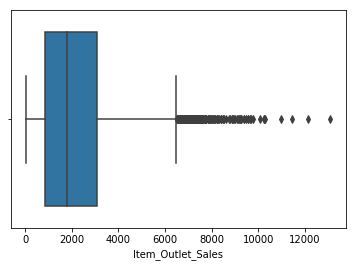

In [192]:
sns.boxplot(Train['Item_Outlet_Sales'])

In [193]:
Train = Train[Train['Item_Outlet_Sales']<7000]

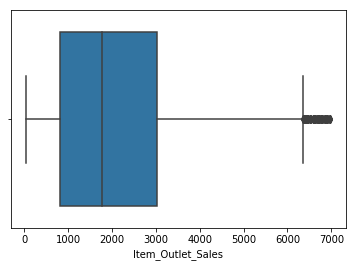

In [194]:
sns.boxplot(Train['Item_Outlet_Sales'])

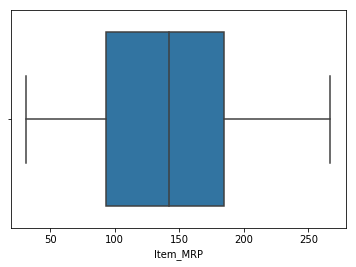

In [195]:
sns.boxplot(Train['Item_MRP'])

In [196]:
Train=Train.reset_index()

In [197]:
del Train['index']

In [198]:
df_y = Train['Item_Outlet_Sales']

In [199]:
del Train['Item_Outlet_Sales']

In [200]:
del Train['Item_Identifier']
del Test['Item_Identifier']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Train['Item_Identifier'] = label_encoder.fit_transform(Train['Item_Identifier'])
Test['Item_Identifier']  = label_encoder.transform(Test['Item_Identifier'] )

In [201]:
(a,b) = Train.shape
a

8398

In [202]:
pre_dummy = pd.concat([Train, Test])

In [203]:
pre_dummy = pre_dummy.reset_index()

In [204]:
df = pd.get_dummies(pre_dummy)

In [205]:
df.head(2)

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [243]:
df_x = df[:a]

In [244]:
df_test = df[a:]

In [245]:
df_test.head(2)

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8398,0,20.75,0.007565,107.8622,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
8399,1,8.30,0.038428,87.3198,2007,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [246]:
df_test = df_test.reset_index()

In [247]:
del df_test['index']
del df_test['level_0']

In [248]:
df_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4,13.600,0.118599,234.2300,1985,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
5,9.800,0.063817,117.1492,1997,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
6,19.350,0.082602,50.1034,2009,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
7,9.195,0.015782,81.0592,1985,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
8,6.305,0.123365,95.7436,2002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
9,5.985,0.005698,186.8924,2007,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [249]:
del df_x['index']

In [250]:
df_x.shape

(8398, 43)

In [251]:
corr_dataset = pd.concat([df_x, df_y],axis=1)

In [252]:
corr_dataset.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,3735.1380
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,443.4228


In [253]:
import numpy as np
cm = np.corrcoef(corr_dataset.values.T)

cr_dt = pd.DataFrame(cm,columns=corr_dataset.columns)
cr_dt.to_csv('CorrelationDataset.csv',index=False)

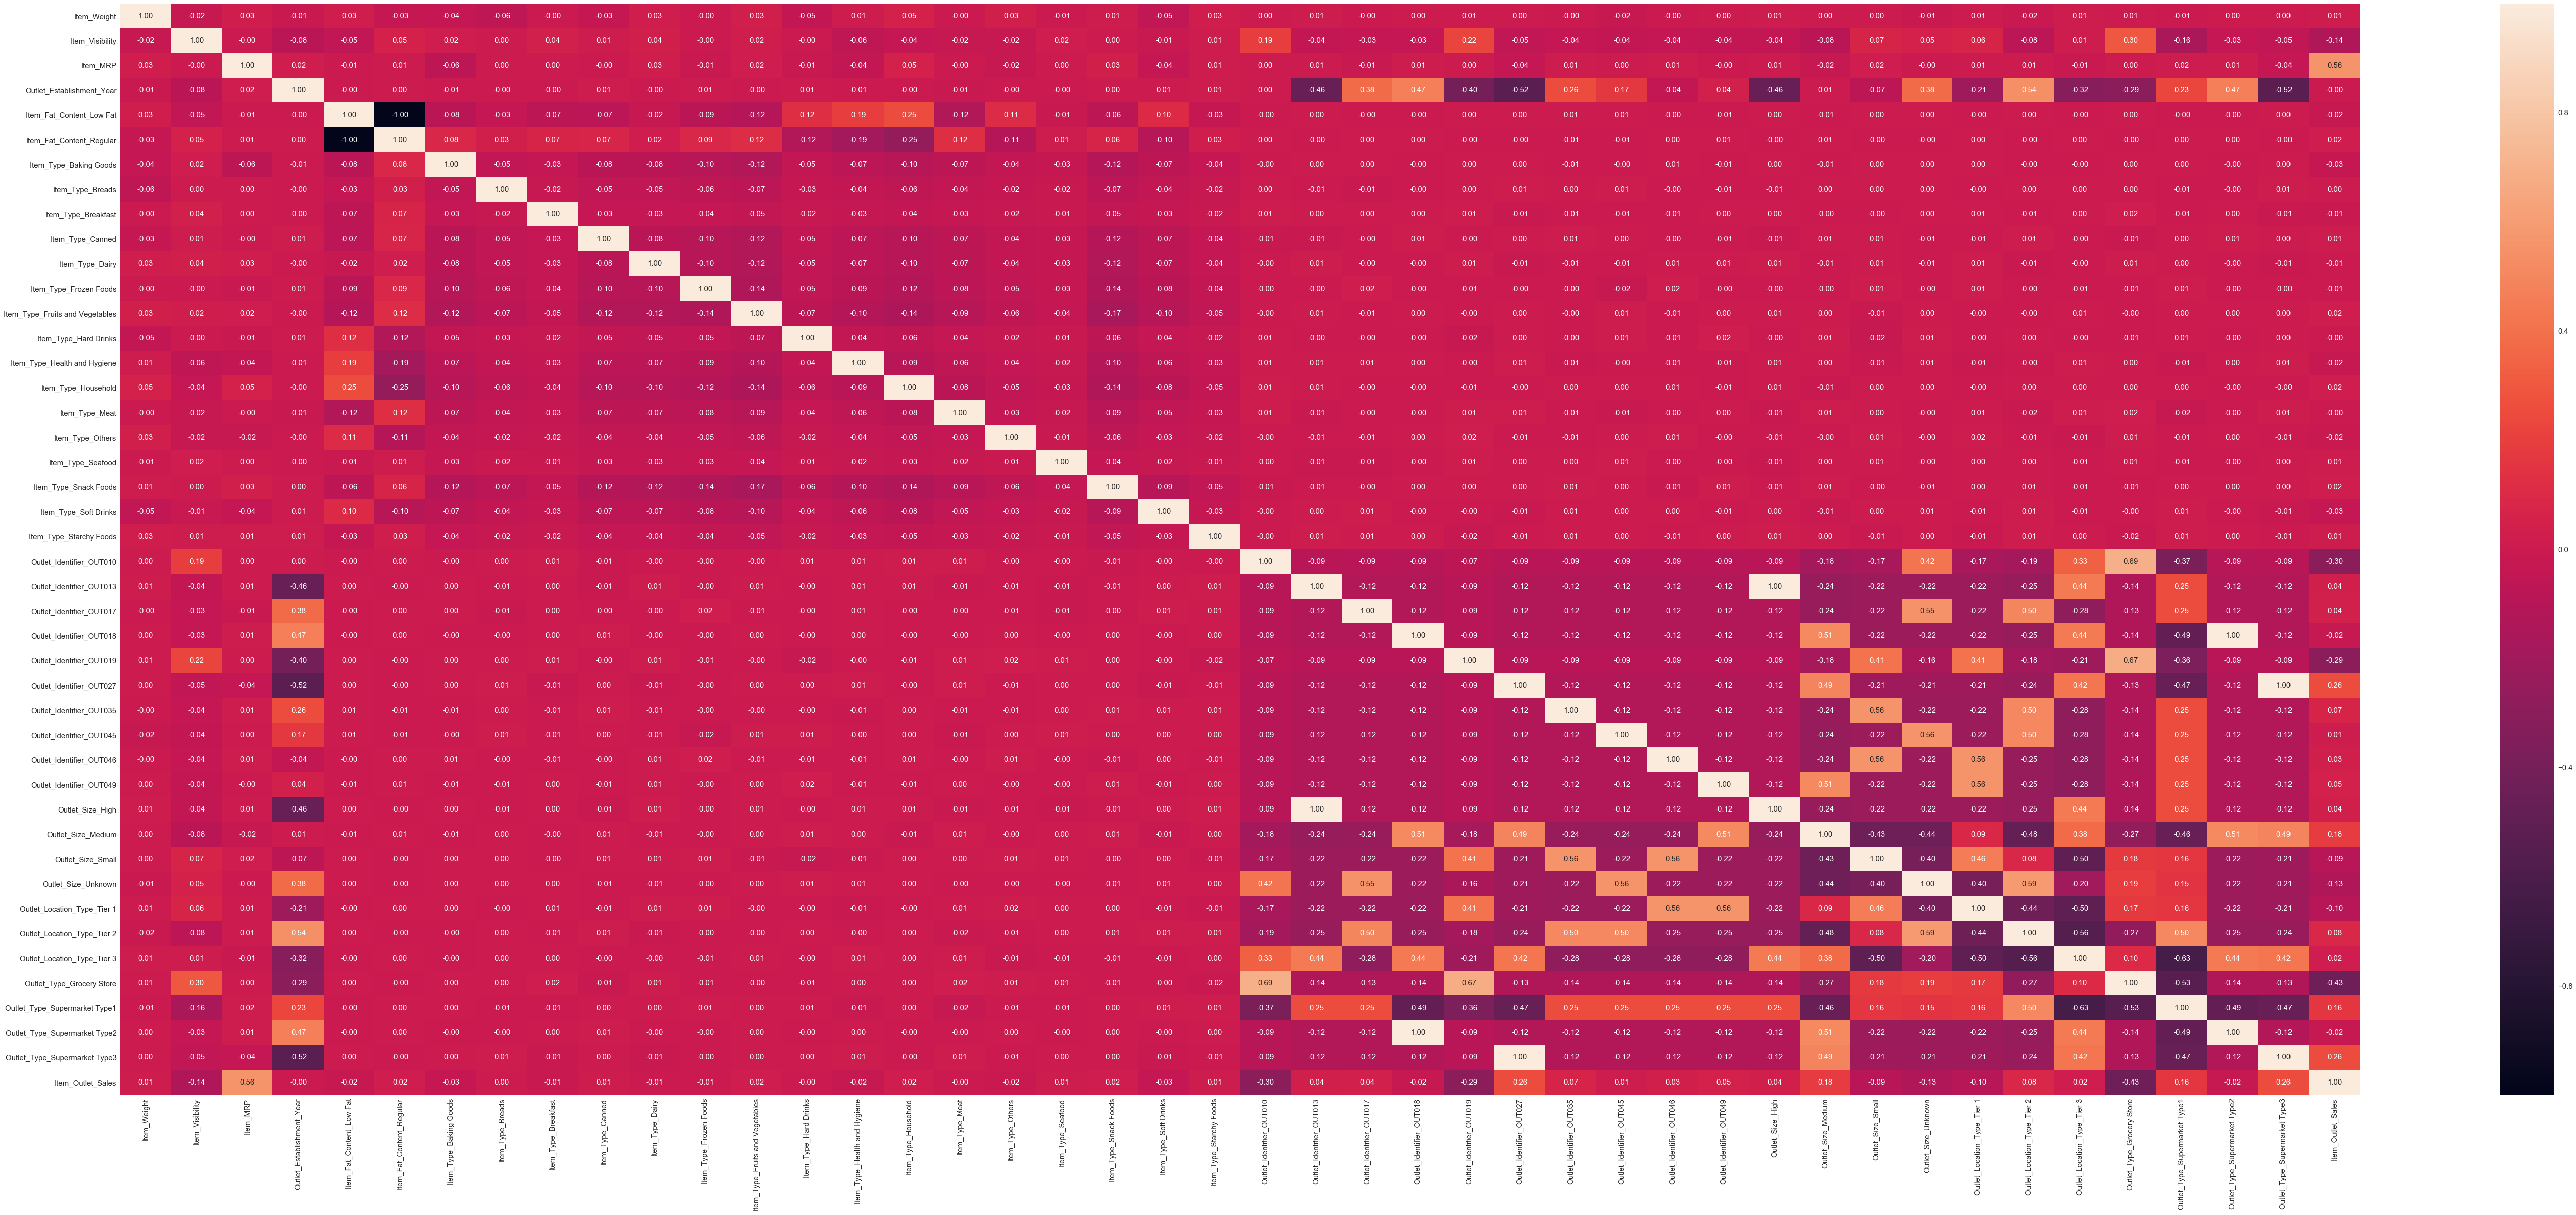

In [254]:
plt.figure(figsize=(100,40))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=False,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=corr_dataset.columns,
                 xticklabels=corr_dataset.columns)

# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [256]:
from sklearn.feature_selection import RFE
rfe = RFE(rfr,21)
col = rfe.fit(df_x,df_y)

In [257]:
df_x.columns[col.support_]

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Health and Hygiene',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [258]:
df_x1 = df_x

In [259]:
df_x = df_x1

In [260]:
col = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Health and Hygiene',
       'Item_Type_Meat', 'Item_Type_Snack Foods', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']

In [261]:
df_x = df_x[col]

In [262]:
df_x.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Health and Hygiene',
       'Item_Type_Meat', 'Item_Type_Snack Foods', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x = sc.fit_transform(df_x)

In [263]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_x,df_y,test_size=0.25,random_state=3)

In [264]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [265]:
y_pred = lr.predict(X_test)

In [266]:
print (r2_score(Y_test,y_pred))
print (sqrt(mean_squared_error(Y_test,y_pred)))

0.5535107328874451
1065.406843185217


In [267]:
ridge = Ridge(alpha=.001)
ridge.fit(X_train,Y_train)
y_pred = ridge.predict(X_test)
print (r2_score(Y_test,y_pred))
print (sqrt(mean_squared_error(Y_test,y_pred)))

0.553510719950296
1065.4068586204448


In [284]:
rfr = RandomForestRegressor(max_depth=6, n_estimators=100, random_state=4)
rfr.fit(X_train,Y_train)
Y_pred =rfr.predict(X_test)
Y_train_pred = rfr.predict(X_train)
print (r2_score(Y_test,Y_pred))
print (r2_score(Y_train,Y_train_pred))
print (sqrt(mean_squared_error(Y_test,Y_pred)))

0.5864090321667178
0.6161548318642253
1025.405147149315


In [269]:
lasso = Lasso(alpha=3)
lasso.fit(X_train,Y_train)
y_pred = lasso.predict(X_test)
print (r2_score(Y_test,y_pred))
print (sqrt(mean_squared_error(Y_test,y_pred)))

0.5546435565094262
1064.0544203581705


In [270]:
el = ElasticNet(alpha=0.01,l1_ratio=0.8)
el.fit(X_train,Y_train)
y_pred = el.predict(X_test)
print (r2_score(Y_test,y_pred))
print (sqrt(mean_squared_error(Y_test,y_pred)))

0.5533256544843588
1065.627636137937


In [271]:
knr = KNeighborsRegressor(n_neighbors=9)
knr.fit(X_train,Y_train)
y_pred = knr.predict(X_test)
print (r2_score(Y_test,y_pred))
print (sqrt(mean_squared_error(Y_test,y_pred)))

0.348615114199159
1286.8526132768343


In [272]:
from sklearn.svm import SVR
svr = SVR(kernel="linear",C=20,gamma=0.01)
svr.fit(X_train,Y_train)
print(svr)
Y_pred = svr.predict(X_test)
Y_train_pred = svr.predict(X_train)
print (r2_score(Y_test,Y_pred))
print (r2_score(Y_train,Y_train_pred))
print (sqrt(mean_squared_error(Y_test,Y_pred)))

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.5436535323021559
0.5531673202949788
1077.1032015928324


In [273]:
df_test = df_test[col]

In [285]:
Y_final_pred =rfr.predict(df_test)

In [286]:
submission_file = pd.read_csv('SampleSubmission.csv')

In [287]:
submission_file['Item_Outlet_Sales'] = Y_final_pred

In [288]:
Y_final_pred.shape

(5681,)

In [289]:
submission_file.to_csv('SampleSubmission.csv',index=False)

In [279]:
submission_file.shape

(5681, 3)